In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [24]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [25]:
cnn = tf.keras.models.Sequential()


In [ ]:
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128,3]))
    cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
    cnn.add(tf.keras.layers.MaxPool2D (pool_size=2, strides=2))



C:\Users\vinot\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D (pool_size=2, strides=2))



In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))



In [31]:
cnn.add(tf.keras.layers.Dropout(0.25))



In [32]:
cnn.add(tf.keras.layers.Flatten())

In [33]:
from tensorflow.keras.optimizers import Adam

cnn.compile(optimizer=Adam(learning_rate=0.0001), 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])


In [34]:
cnn.add(tf.keras.layers.Dense(units=1508,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

#Compiling and Training Phase

cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1508)           │     3,089,892 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1508)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 38)             │        57,342 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,859,458 (29.98 MB)

 Trainable params: 7,859,458 (29.98 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1423s 646ms/step - accuracy: 0.4009 - loss: 2.1446 - val_accuracy: 0.8489 - val_loss: 0.4846
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1874s 853ms/step - accuracy: 0.8351 - loss: 0.5249 - val_accuracy: 0.9133 - val_loss: 0.2692
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1894s 862ms/step - accuracy: 0.9041 - loss: 0.2982 - val_accuracy: 0.9201 - val_loss: 0.2384
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1545s 703ms/step - accuracy: 0.9338 - loss: 0.2028 - val_accuracy: 0.9473 - val_loss: 0.1661
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1470s 669ms/step - accuracy: 0.9514 - loss: 0.1492 - val_accuracy: 0.9479 - val_loss: 0.1606
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1466s 667ms/step - accuracy: 0.9625 - loss: 0.1148 - val_accuracy: 0.9504 - val_loss: 0.1631
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1469s 669ms/step - accuracy: 0.9702 - loss: 0.0921 - val_accuracy: 0.9607 - val_loss: 0.1214
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1520s 692ms/s

In [36]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training Loss:', train_loss)
print('Training Accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 332s 151ms/step - accuracy: 0.9855 - loss: 0.0429
Training Loss: 0.038181956857442856
Training Accuracy: 0.9875240325927734


In [37]:
val_loss,val_acc= cnn.evaluate(validation_set)
print('Validation Loss:', val_loss)
print('Validation Accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 81s 148ms/step - accuracy: 0.9599 - loss: 0.1302
Validation Loss: 0.12755495309829712
Validation Accuracy: 0.9603345990180969


In [38]:
cnn.save('trained_plant_disease_model.keras')

In [39]:
training_history.history

{'accuracy': [0.6049932241439819,
  0.8589942455291748,
  0.9136496186256409,
  0.9390283823013306,
  0.9546482563018799,
  0.9656020998954773,
  0.9716338515281677,
  0.9766982197761536,
  0.9781349897384644,
  0.9827584028244019],
 'loss': [1.347725749015808,
  0.4474022388458252,
  0.26742255687713623,
  0.18407504260540009,
  0.138584166765213,
  0.10717053711414337,
  0.08729884028434753,
  0.073227658867836,
  0.0680130198597908,
  0.053240176290273666],
 'val_accuracy': [0.8489073514938354,
  0.9133280515670776,
  0.9201001524925232,
  0.947302520275116,
  0.9479285478591919,
  0.9503756165504456,
  0.9607329964637756,
  0.9540746808052063,
  0.9715456366539001,
  0.9603345990180969],
 'val_loss': [0.4845990836620331,
  0.2691677212715149,
  0.23837164044380188,
  0.16608837246894836,
  0.1605619341135025,
  0.1631140410900116,
  0.12142679840326309,
  0.15862567722797394,
  0.09332771599292755,
  0.12755487859249115]}

In [40]:
import json
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

In [41]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


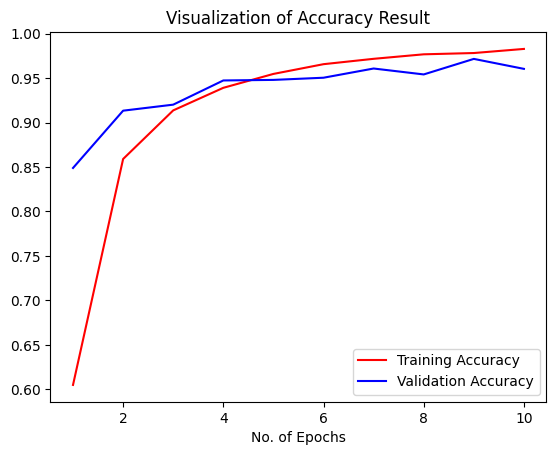

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [43]:
class_name = validation_set.class_names
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [45]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

Y_true

predicted_categories


from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

# Precision Recall Fscore
print(classification_report(Y_true, predicted_categories, target_names=class_name))

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 271s 15ms/step
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.97      0.96       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.95      0.95       440
                                   Apple___healthy       0.94      0.98      0.96       502
                               Blueberry___healthy       0.99      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.97      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.87      0.91       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___N

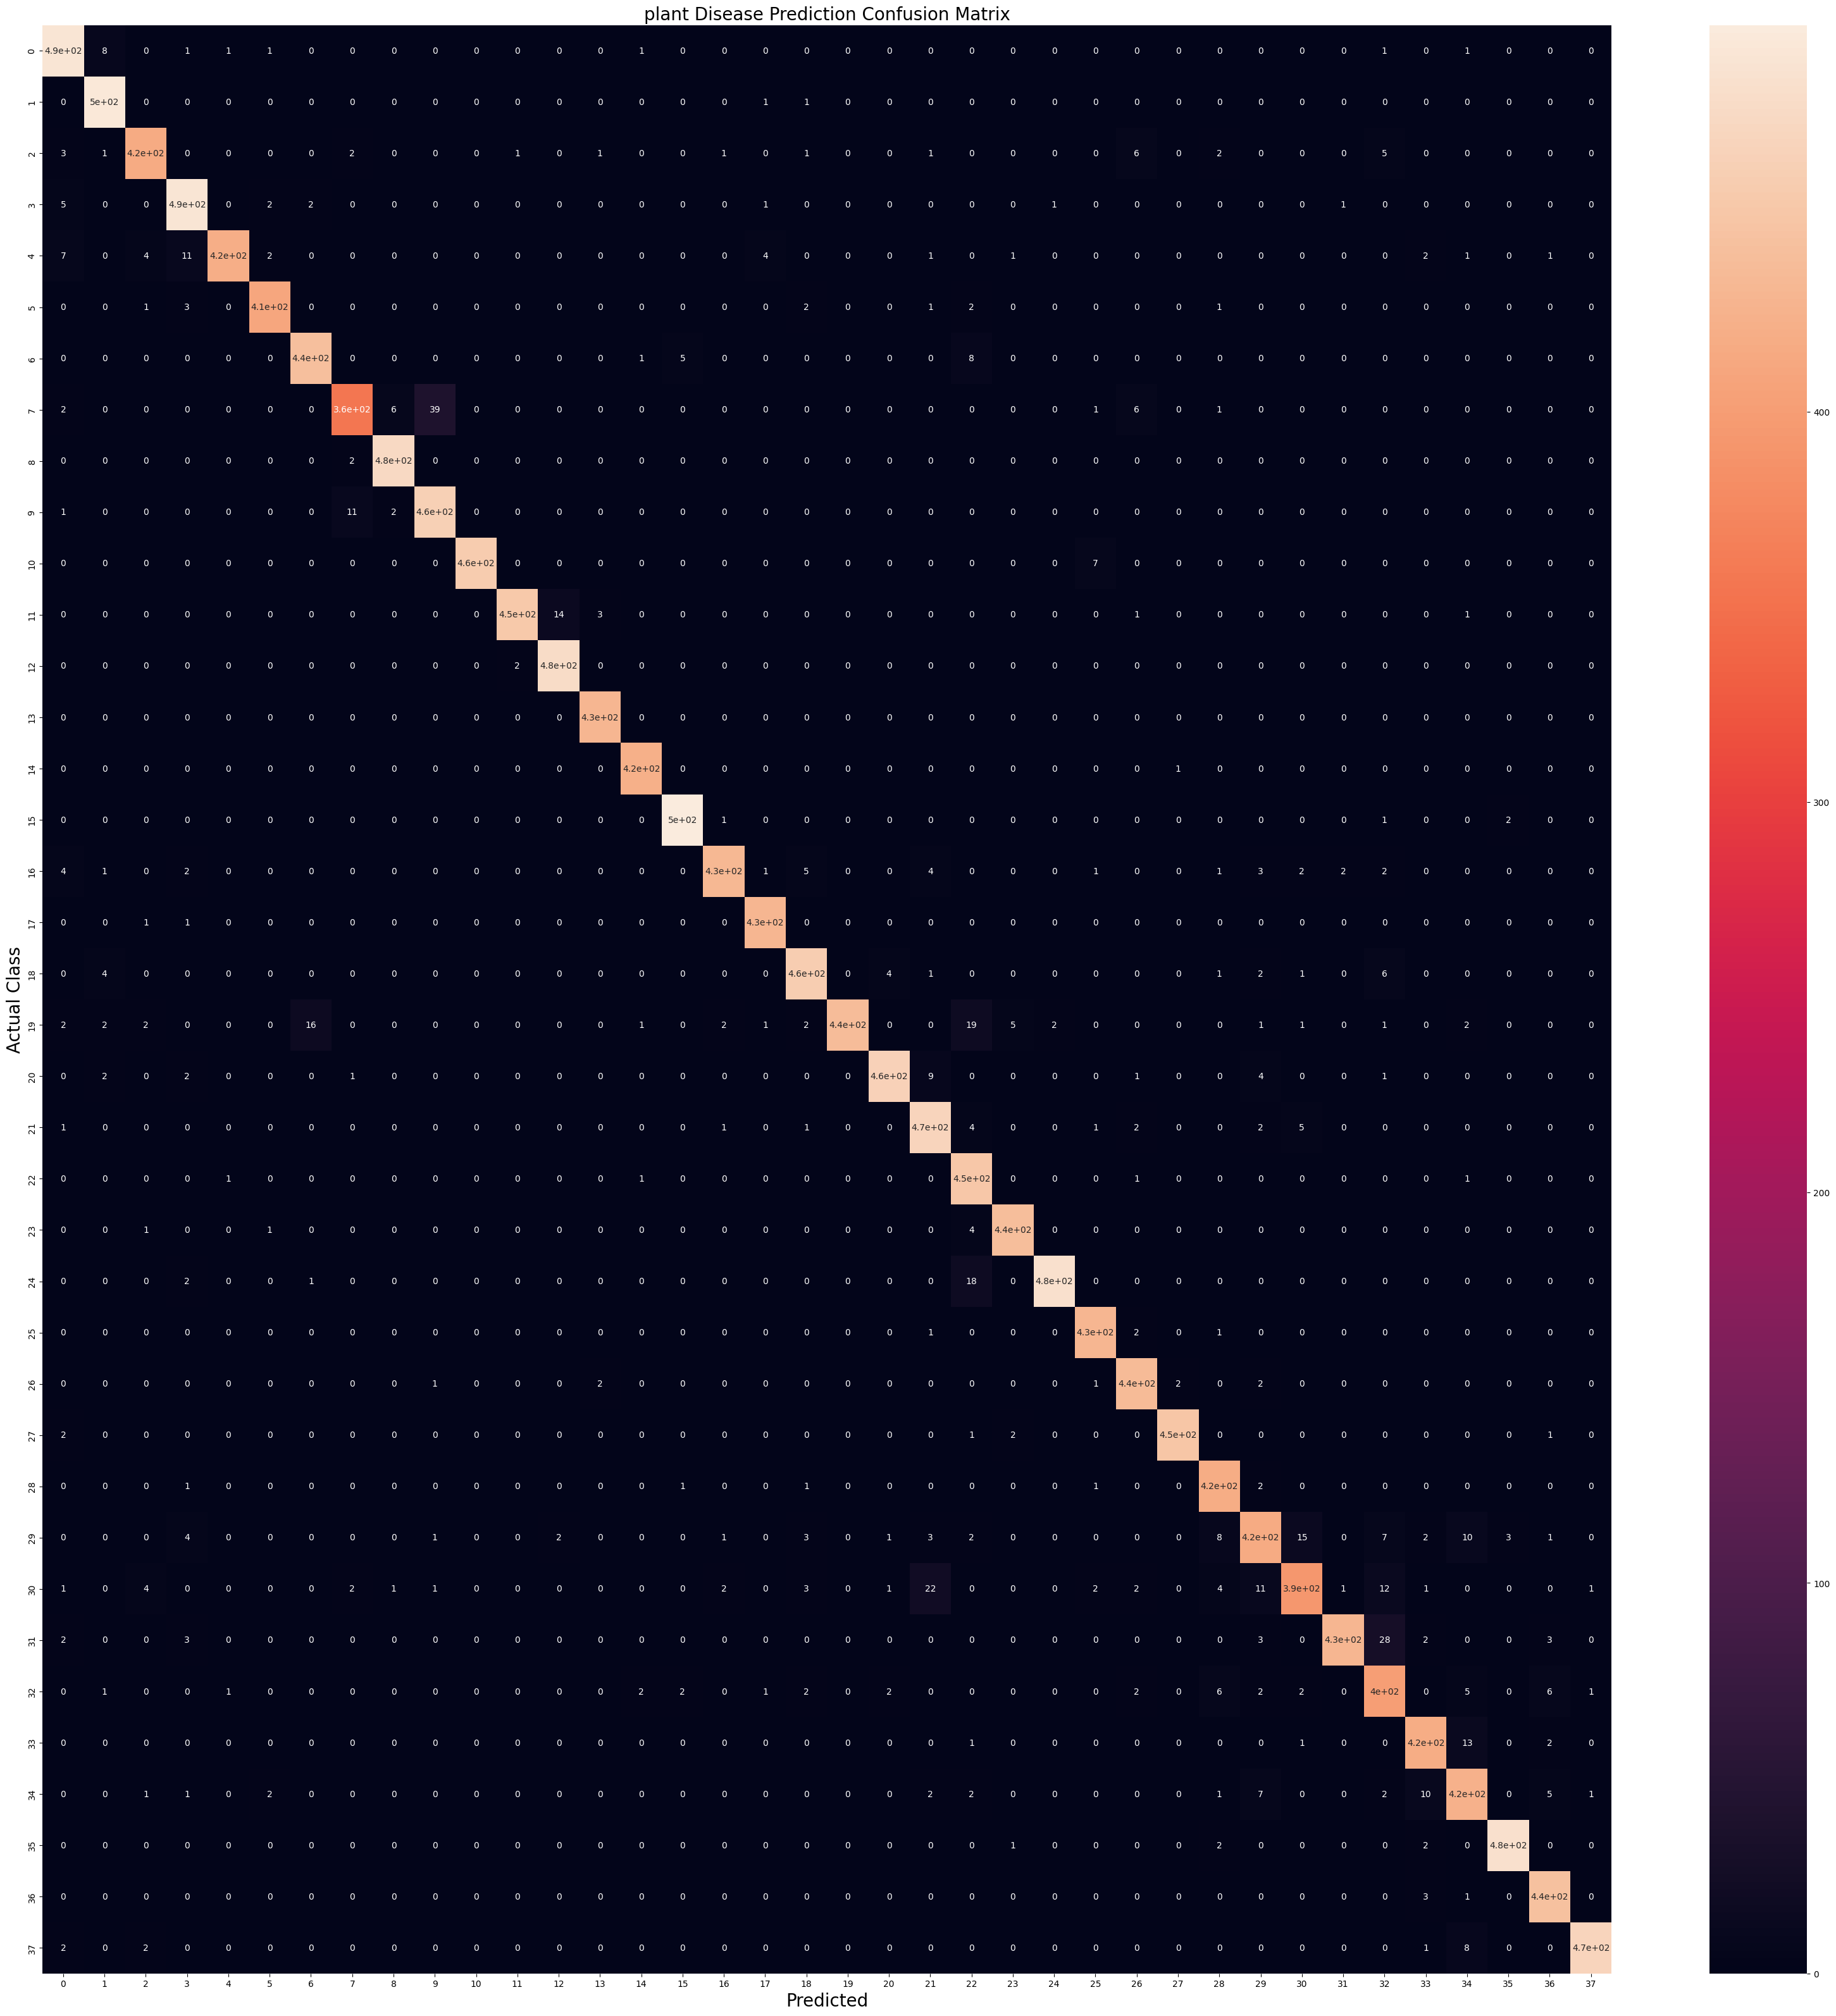

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel('Predicted',fontsize = 20)
plt.ylabel('Actual Class',fontsize=20)
plt.title('plant Disease Prediction Confusion Matrix',fontsize=20)
plt.show()